In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df = pd.read_csv('co2.csv')

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(7385, 12)

In [6]:
len(df)

7385

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [3]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

In [10]:
df[df['Make'] == 'SMART'][['Make' , 'Fuel Type']]

,Make,Fuel Type
943,SMART,Z
944,SMART,Z
2072,SMART,Z
2073,SMART,Z
3189,SMART,Z
3190,SMART,Z
4255,SMART,Z


In [11]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Make"] = le.fit_transform(df["Make"])
df["Make"].value_counts()

Make
13    628
9     588
5     527
28    419
32    376
39    330
15    328
3     286
31    259
20    251
11    246
21    231
16    214
17    210
29    204
40    197
27    180
24    178
19    160
8     158
38    140
41    124
18    108
7     103
33     97
25     96
30     95
10     88
23     85
12     73
0      72
26     61
34     50
2      47
4      46
22     41
1      30
14     25
35     22
36      7
6       3
37      2
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [14]:
df['Model'].value_counts()

Model
F-150 FFV               32
F-150 FFV 4X4           32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
Camry TRD                1
Cullinan Black Badge     1
1500 4X4 EcoDiesel       1
1500 EcoDiesel           1
Sentra SR                1
Name: count, Length: 2053, dtype: int64

In [15]:
df.drop('Model' , axis =1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Vehicle Class                     7385 non-null   object 
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   object 
 5   Fuel Type                         7385 non-null   object 
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 634.8+ KB


In [17]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [18]:
df["Vehicle Class"] = le.fit_transform(df["Vehicle Class"])

In [19]:
df["Vehicle Class"].value_counts()

Vehicle Class
11    1217
2     1133
0     1022
12     735
1      639
10     606
6      538
13     460
3      326
9      252
5      159
4       80
7       77
15      66
8       53
14      22
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Vehicle Class                     7385 non-null   int64  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   object 
 5   Fuel Type                         7385 non-null   object 
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 634.8+ KB


In [21]:
df['Transmission'].value_counts()

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

In [22]:
df["Transmission"] = le.fit_transform(df["Transmission"])

In [23]:
df["Transmission"].value_counts()

Transmission
15    1324
17    1211
25     901
3      789
5      490
9      445
6      339
16     319
19     295
24     193
12     168
8      132
22     118
21     113
26      91
2       84
18      77
1       65
10      62
4       53
23      39
0       31
14      26
20      11
7        4
11       3
13       2
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Vehicle Class                     7385 non-null   int64  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int64  
 5   Fuel Type                         7385 non-null   object 
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 634.8+ KB


In [25]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [26]:
df["Fuel Type"] = le.fit_transform(df["Fuel Type"])

In [27]:
df['Fuel Type'].value_counts()

Fuel Type
3    3637
4    3202
1     370
0     175
2       1
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Vehicle Class                     7385 non-null   int64  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int64  
 5   Fuel Type                         7385 non-null   int64  
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 634.8 KB


In [29]:
correlation = df.corr()
correlation

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Vehicle Class,-0.029558,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),0.182649,-0.277606,-0.757854,-0.719321,0.331213,-0.016880,-0.927059,-0.890638,-0.925576,1.000000,-0.907426


<Axes: >

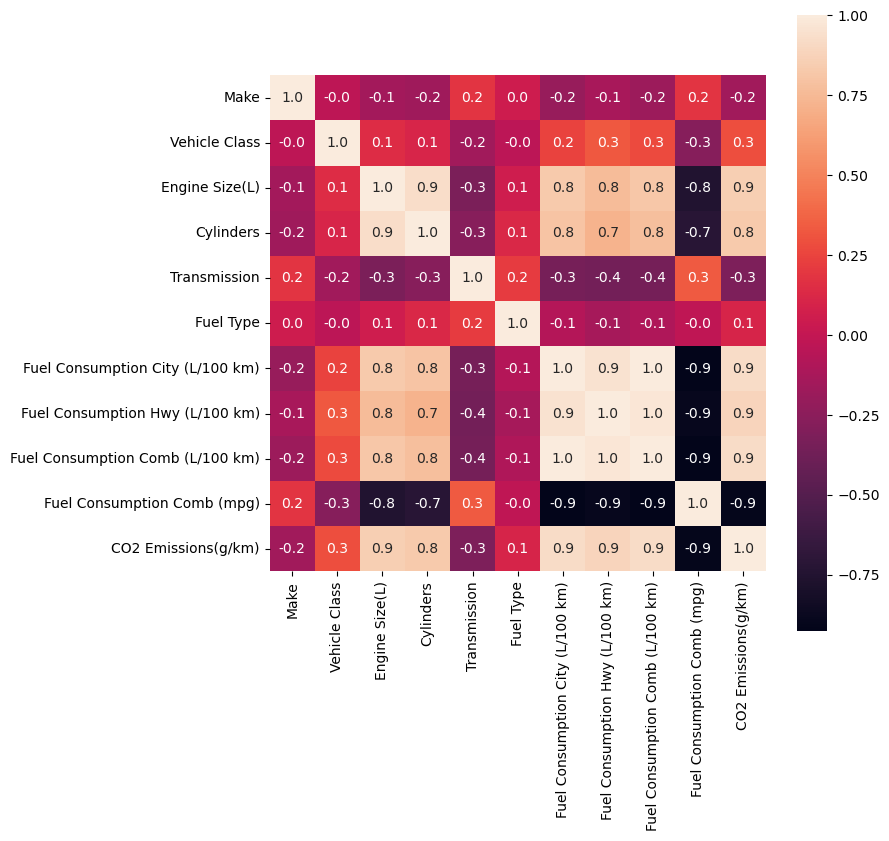

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True)

# DATA SPLITTING 

In [31]:
X = df.drop('CO2 Emissions(g/km)', axis=1)
Y = df['CO2 Emissions(g/km)']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Vehicle Class                     7385 non-null   int64  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int64  
 5   Fuel Type                         7385 non-null   int64  
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 577.1 KB


In [33]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7385 entries, 0 to 7384
Series name: CO2 Emissions(g/km)
Non-Null Count  Dtype
--------------  -----
7385 non-null   int64
dtypes: int64(1)
memory usage: 57.8 KB


In [34]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =
0.25, random_state=25)
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  5538
Size of Train Y =  5538
Size of Test X =  1847
Size of Test Y =  1847


# LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_TRAIN, Y_TRAIN)
LinearRegression()

LinearRegression()

# Prediction on Train Data

In [36]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_TRAIN)
print(training_data_prediction)

[280.013408   315.84268011 144.72620894 ... 294.17432435 236.5539138
 198.74325804]


In [37]:
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9153849568066784
Mean Absolute Error :  11.17147303195528


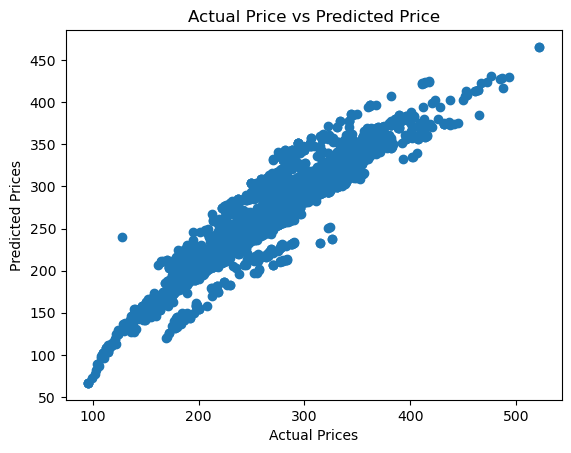

In [39]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on Test Data

In [40]:
y_pred = model.predict(X_TEST)
y_pred
print(y_pred)

[233.2941932  283.77211363 242.956709   ... 237.3456667  191.57369611
 174.13609452]


In [42]:
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.9173989134759174
Mean Absolute Error :  11.044093610214464


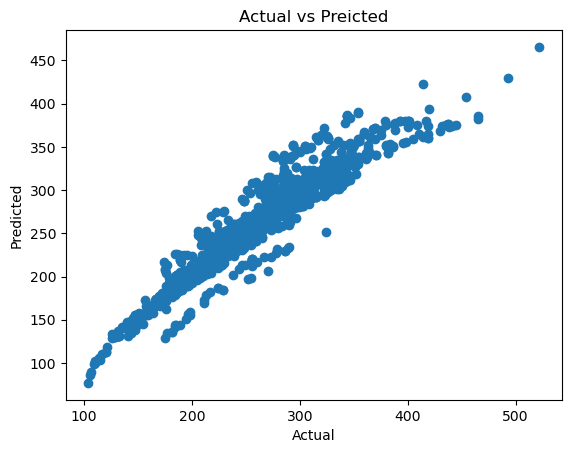

In [44]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# SVM REGRESSION

In [45]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_TRAIN, Y_TRAIN)
SVR(kernel='linear')

SVR(kernel='linear')

# Prediction on Train Data

In [47]:
# accuracy for prediction on training data
training_data_prediction = svr.predict(X_TRAIN)
print(training_data_prediction)

[279.58450148 319.15835613 150.61361469 ... 290.65433483 279.41839813
 193.94021626]


In [48]:
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.812235212106675
Mean Absolute Error :  8.393098579369461


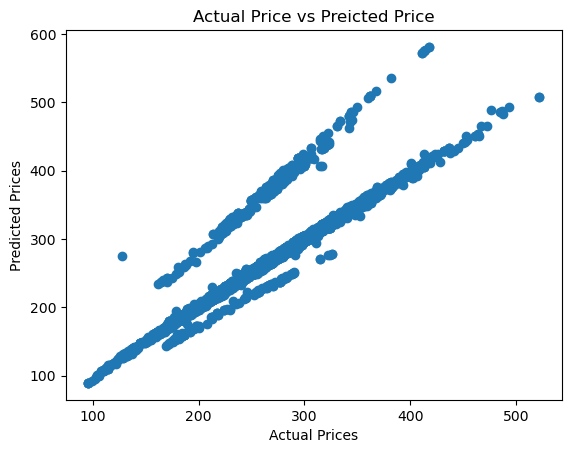

In [49]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [50]:
y_pred = svr.predict(X_TEST)
y_pred
print(y_pred)

[241.93941487 283.5429716  238.16100842 ... 233.67655131 185.32175089
 174.78062399]


In [51]:
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.819230911133283
Mean Absolute Error :  8.066009439876659


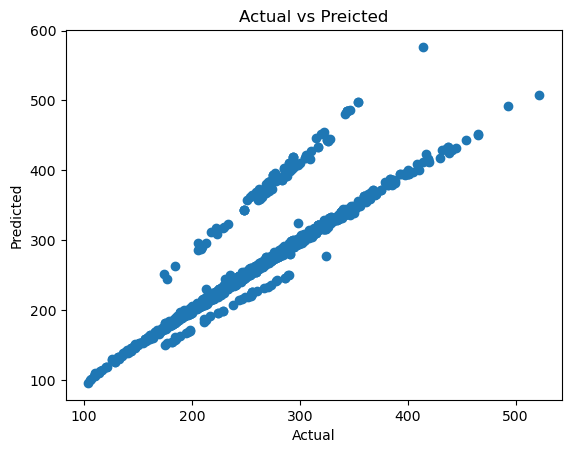

In [52]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# REGRESSION DECISION TREE

In [53]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 25)
# fit the regressor with X and Y data
regressor.fit(X_TRAIN, Y_TRAIN)
DecisionTreeRegressor(random_state=25)

DecisionTreeRegressor(random_state=25)

# Prediction on Train Data

In [54]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[279.         321.         150.66666667 ... 290.         195.
 195.        ]


In [55]:
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9996932983241511
Mean Absolute Error :  0.37144834820891154


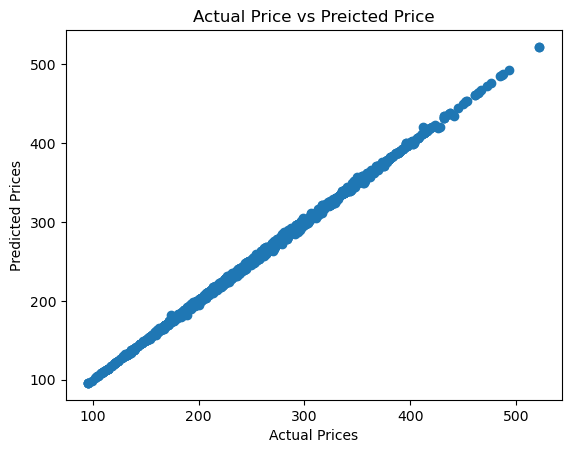

In [56]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [57]:
y_pred = regressor.predict(X_TEST)
y_pred
print(y_pred)

[244.  285.  238.  ... 233.  186.  172.5]


In [58]:
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.9975867297567413
Mean Absolute Error :  1.6402377085105833


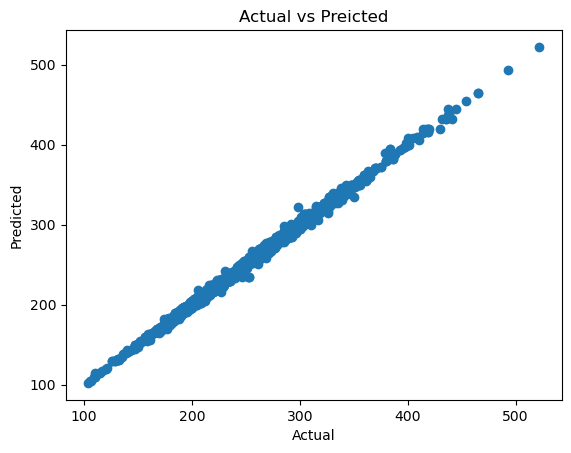

In [59]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=25)
# fit the regressor with X and Y data
regressor.fit(X_TRAIN, Y_TRAIN)
RandomForestRegressor(n_estimators=5, random_state=25)

RandomForestRegressor(n_estimators=5, random_state=25)

# Prediction on Training Data

In [62]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[278.2        321.         151.65333333 ... 290.         182.4
 195.        ]


In [63]:
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9991172692628274
Mean Absolute Error :  0.8785836894937649


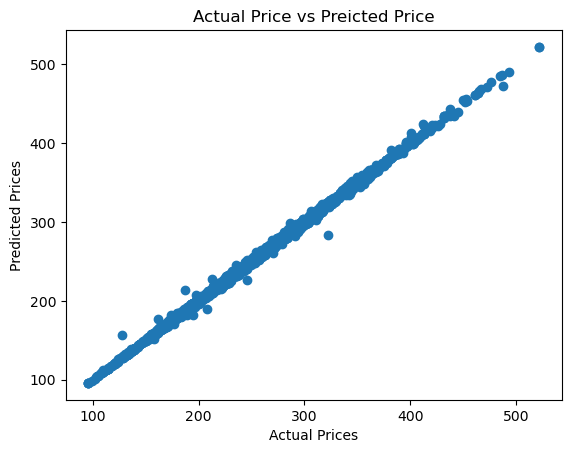

In [64]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [71]:
y_pred = regressor.predict(X_TEST)
y_pred

array([244.        , 285.        , 238.        , ..., 232.4       ,
       186.        , 174.06666667])

In [72]:
# R squared error
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.9975115254335551
Mean Absolute Error :  1.818620193498374


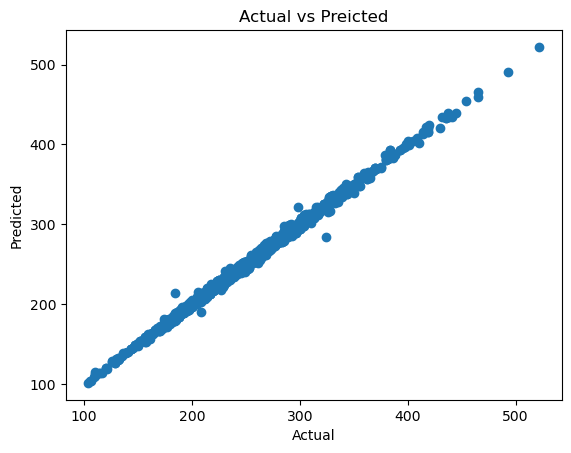

In [67]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

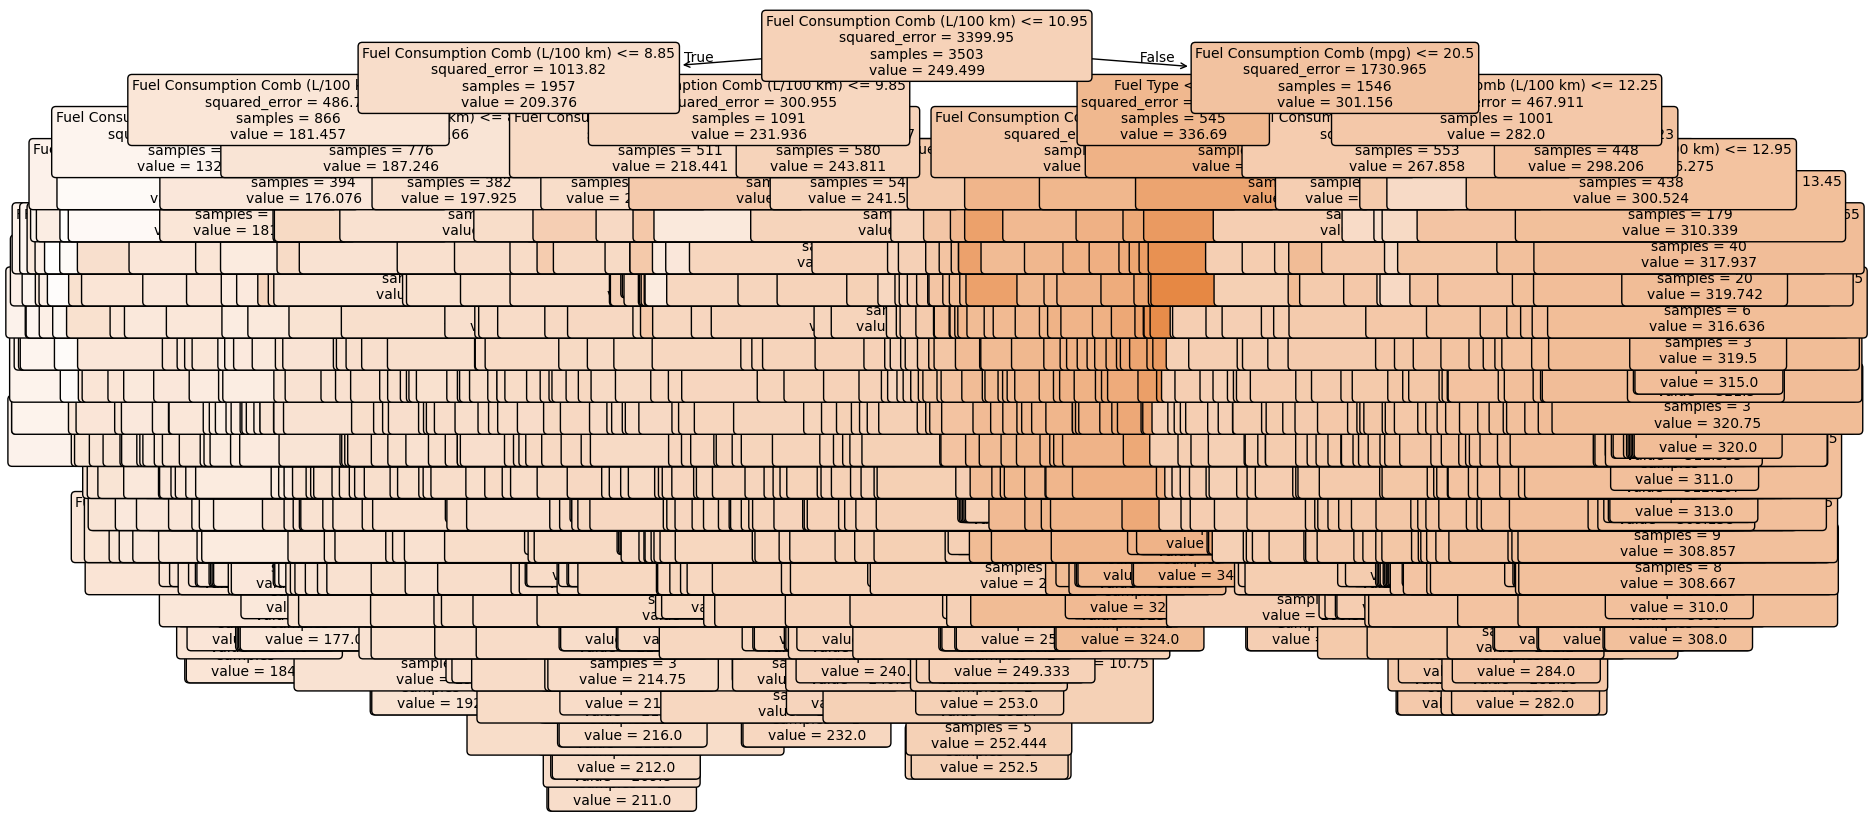

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(),
filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()